# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('./emp_automovel.csv')

In [3]:
dados #Base de dados ja esta tratada

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [4]:
x = dados.drop('inadimplente', axis= 1) #Estou coletando as variaveis explicativas, que irão auxiliar na resposta para a variavel alvo(são todas as colunas menos a inadimplente) o axis seria para falar que a coluna daa base de dados esta sendo alterada
y = dados['inadimplente'] #Variavel alvo

In [5]:
from sklearn.tree import DecisionTreeClassifier #Atraves da biblioteca scikit-learn é possível utilizar algoitmos de Machinelearning cmomo a arvore de decisão

In [6]:
modelo = DecisionTreeClassifier() #Criando o modelo
modelo.fit(x,y) #O modelo ira entender os padrões dos dados passados e ira aprender dados novos
modelo.score(x,y) #Estou testando para verificar a taxa de acerto do modelo

1.0

In [7]:
print(f'Acurácia: {modelo.score(x,y)}') #taxa de acerto

Acurácia: 1.0


In [8]:
from sklearn.model_selection import train_test_split #irei usar essa biblioteca para poder separar os dados, em treino, validação e teste com o intuito de poder realizar uma validação do modelo mais acertiva, 

In [9]:
x, x_teste, y, y_teste = train_test_split(x,y, test_size = 0.15, stratify= y, random_state=5  ) #O test_size indica que 15% dos dados serão usados para teste, e os 85% restantes para treinamento, o stratify garante que a divisão dos dados respeite a proporção das classes de y no conjunto original, mantém o balanceamento das classes nos conjuntos de treino e teste, e o x,y seriam a base dos dados que estão divididos
x_treino, x_val, y_treino, y_val = train_test_split(x,y, stratify= y, random_state=5) #O valor de x e y não são mais os mesmos de antes poi por contya do codigo anterior, só a parte de treino e validação esta sendo separada

In [10]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}') #Esse seria o teste com os dados novos, pois o modelo não viu esses dados durante o treinamento

Acurácia de treino: 1.0
Acurácia de validação: 0.846441947565543


In [11]:
modelo = DecisionTreeClassifier(max_depth=10) #Estou definindo a profundiade da arvore, para evitar que a mesma não apenas memorize os dados de treinamento, com isso o modelo esta aprendendo melhor o padrão dos dados, inves de decorar
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}') 

Acurácia de treino: 0.9206445993031359
Acurácia de validação: 0.9058444386377493


In [12]:
from sklearn.metrics import confusion_matrix #A matriz ira comparar o resultado de classificação do modelo com o resultado real

In [13]:
y_previsto = modelo.predict(x_val) #O modelo esta fazendo uma previsão(Esta entendendo os padrões dods dados e dando uma resposta) com base em dados que não foram visto durante o treinamento
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10356   123]
 [  958    44]]


In [14]:
from sklearn.metrics import ConfusionMatrixDisplay #Ira melhorar o entendimento da matriz

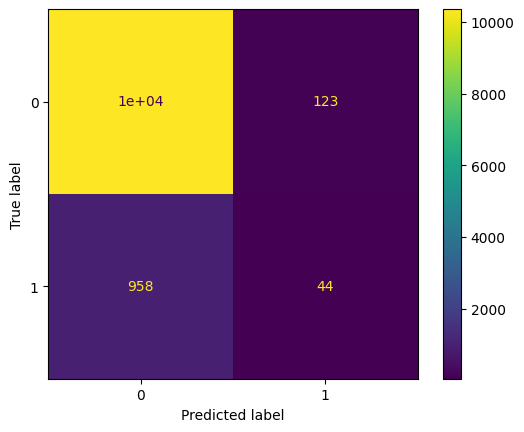

In [15]:
vizualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao)
vizualizacao.plot(); #O ponto e virgula faz com que não mostre as informações textual que aparecem acima dos dados

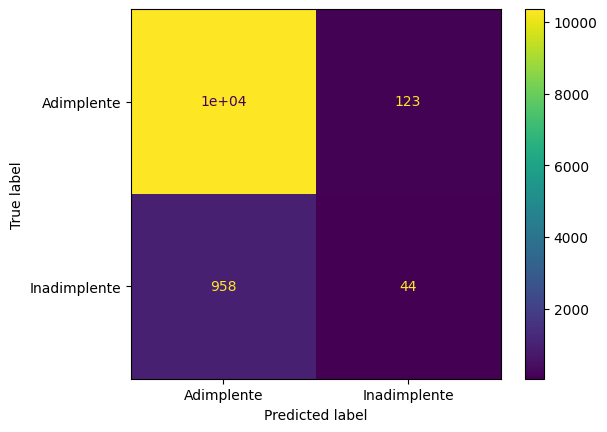

In [16]:
vizualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao, display_labels=['Adimplente', 'Inadimplente']) #Estou trocando os valores de 0 e 1 que aparecem no grtafico acima
vizualizacao.plot();
#1e+04 seria 10 elevado a 4, no caso seria 10000

In [17]:
from sklearn.metrics import accuracy_score #ira mostrar a taxa de acerto da matriz_confusao

In [18]:
print(f'Acuracia : {accuracy_score(y_val, y_previsto)} ') 

Acuracia : 0.9058444386377493 


In [19]:
from sklearn.metrics import precision_score, recall_score #A precisão ajuda a entender as amostras que o modelo previu como positivas, quantas realmente são positivas (É uma métrica importante para cenários em que queremos minimizar falsos positivos (por exemplo, quando acusar algo como “positivo” tem um custo alto) e o recall ira mostrar as amostras que são realmente positivas, quantas o modelo detectou corretamente(É relevante quando queremos minimizar falsos negativos (por exemplo, detecção de doença, pois não queremos deixar de detectar um caso positivo)).

In [20]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.2634730538922156
Recall: 0.043912175648702596


In [21]:
from sklearn.metrics import f1_score

In [22]:
print(f'F1: {f1_score(y_val, y_previsto)}') #Seria a média entre Precisão e Revocação, é útil quando buscamos um equilíbrio entre evitar falsos positivos e falsos negativos

F1: 0.07527801539777587


In [23]:
from sklearn.metrics import RocCurveDisplay #É um recurso que gera e exibe graficamente a Curva ROC, facilitando a visualização do desempenho do modelo ao longo de todos os limiares possíveis de previsão de probabilidade.

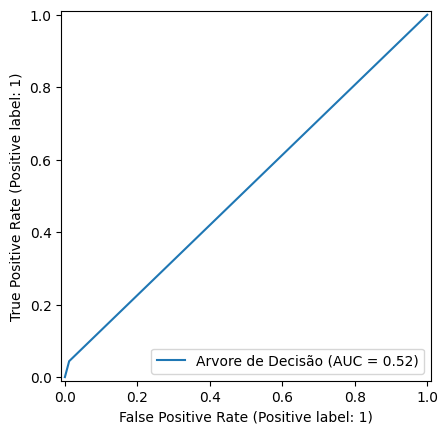

In [24]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Arvore de Decisão');

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}') #A Curva ROC é um gráfico que mostra como a taxa de verdadeiros positivos se comporta em função da taxa de falsos positivos (FPR), conforme varia o limiar de classificação de um modelo.
# A AUC é a área sob essa curva.

# AUC = 1.0: Significa que o classificador é perfeito, separa 100% das vezes as classes positiva e negativa sem erro.
# AUC = 0.5: Equivale a um modelo que está “chutando” de forma aleatória (desempenho aleatório).
# Quanto mais próximo de 1, melhor o modelo está em distinguir as classes ao longo de todos os limiares possíveis.

AUC: 0.5160872072059718


In [27]:
from sklearn.metrics import PrecisionRecallDisplay 

# É usada para gerar e exibir a Curva de Precisão-Revocação de um modelo de classificação. Essa curva é utilizada em casos de classes desbalanceadas, pois mostra a relação entre:

# Precisão (Precision): dentre as amostras previstas como positivas, quantas realmente o são?
# Revocação (Recall): dentre as amostras que são realmente positivas, quantas o modelo conseguiu prever como positivas?

# É muito utilizada em problemas de classificação, quando possui um forte desbalanceamento entre as classes (por exemplo, detecção de fraudes ou detecção de doenças raras), a Curva ROC pode se ser menos informativa. Porque a taxa de falsos positivos (FPR), usada na Curva ROC, pode permanecer muito baixa em cenários com poucos casos negativos, mesmo que o modelo não esteja sendo realmente efetivo na identificação dos positivos.

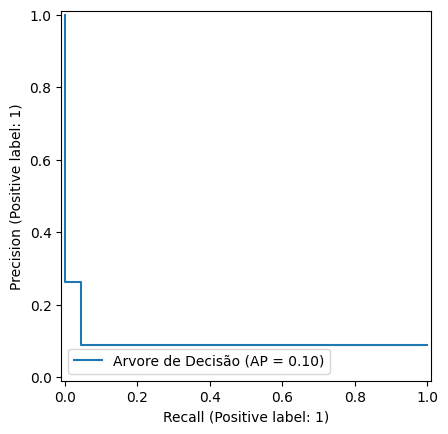

In [28]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Arvore de Decisão')

In [29]:
from sklearn.metrics import average_precision_score #Ira calcular a média da precisão (average precision, AP) ao longo de toda a curva de Precisão-Revocação. EÉ mais utilizado em problemas de classificação binária, especialmente quando o conjunto de dados é desbalanceado e é mais interessante acompanhar como a precisão varia em função da revocação (em vez de olhar para a Curva ROC).

In [30]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09501188388803851


In [31]:
from sklearn.metrics import classification_report #Ira construir um relatorio com todas as metricas geradas anteriormente 

In [32]:
print(classification_report(y_val, y_previsto)) #O support seria a quantidade de dados para cada classe(no caso seria a quantidade de clientes em cada classe, seria os Adimplentes e Inadimplentes), o resumo auxilia bastante para poder realizar uma avaliação do modelo de forma mais direta, sem precisar aplicar metrica por metrica

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.08      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481

